# Model Training - MobileNetV3 (base)

### 0. Imports

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.applications import MobileNetV3Large
from keras.applications.mobilenet_v3 import preprocess_input
from keras.callbacks import (
    ModelCheckpoint,
    EarlyStopping,
    ReduceLROnPlateau
)
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from keras.metrics import Precision, Recall
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model

### 1. Paths

In [3]:
# DATASET_BASE_TRAIN_PATH = "/Users/adamdabkowski/DataspellProjects/Praca_dyplomowa/data/train_resized"
# DATASET_BASE_TRAIN_PATH = "/Users/adamd/DataspellProjects/Facial Expressions Recognition/data/train_resized"
# DATASET_BASE_TRAIN_PATH = "/Users/adamd/DataspellProjects/Facial Expressions Recognition/data/train_merged"
DATASET_BASE_TRAIN_PATH = "/Users/adamd/DataspellProjects/Facial Expressions Recognition/data/train_merged_cleaned"

# DATASET_BASE_TRAIN_PATH = "../new_data"

# DATASET_BASE_TEST_PATH = "/Users/adamdabkowski/DataspellProjects/Praca_dyplomowa/data/test_resized"
DATASET_BASE_TEST_PATH = "/Users/adamd/DataspellProjects/Facial Expressions Recognition/data/test_resized"

### 2. Data preprocessing

In [10]:
batch_size  = 32
img_size = 224

train_validation_data_generator = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)

train_generator = train_validation_data_generator.flow_from_directory(
    DATASET_BASE_TRAIN_PATH,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    subset='training',
    shuffle=True,
)

validation_generator = train_validation_data_generator.flow_from_directory(
    DATASET_BASE_TRAIN_PATH,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    subset='validation',
    shuffle=True,
)

Found 23689 images belonging to 7 classes.
Found 5919 images belonging to 7 classes.


### 5. Model creating

In [11]:
CATEGORIES = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

In [12]:
checkpoint = ModelCheckpoint(
    filepath="./model_mobilenet_v3_base.h5",
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min'
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True,
)

reduce_learning_rate = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=5,
    verbose=1,
    min_lr=0.00001,
)

callbacks_list = [early_stopping, checkpoint, reduce_learning_rate]

In [13]:
model = Sequential()

base_model = MobileNetV3Large(input_shape=(img_size, img_size, 3), include_top=False, weights=None)
model.add(base_model)

model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [14]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        Precision(name='precision'),
        Precision(class_id=0, name='precision_angry'),
        Precision(class_id=1, name='precision_disgust'),
        Precision(class_id=2, name='precision_fear'),
        Precision(class_id=3, name='precision_happy'),
        Precision(class_id=4, name='precision_neutral'),
        Precision(class_id=5, name='precision_sad'),
        Precision(class_id=6, name='precision_surprise'),
        Recall(name='recall'),
        Recall(class_id=0, name='recall_angry'),
        Recall(class_id=1, name='recall_disgust'),
        Recall(class_id=2, name='recall_fear'),
        Recall(class_id=3, name='recall_happy'),
        Recall(class_id=4, name='recall_neutral'),
        Recall(class_id=5, name='recall_sad'),
        Recall(class_id=6, name='recall_surprise'),
    ]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Functiona  (None, 7, 7, 960)        2996352   
 l)                                                              
                                                                 
 global_average_pooling2d_1   (None, 960)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 512)               492032    
                                                                 
 dense_3 (Dense)             (None, 7)                 3591      
                                                                 
Total params: 3,491,975
Trainable params: 3,467,575
Non-trainable params: 24,400
_________________________________________________________________


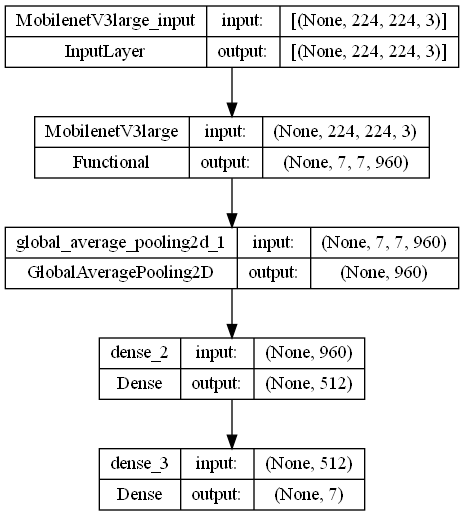

In [15]:
plot_model(model, to_file='model_mobilenet_v3_base.png', show_shapes=True, show_layer_names=True)

### 6. Model training

In [16]:
epochs = 50

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n//train_generator.batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.n//validation_generator.batch_size,
    callbacks=callbacks_list,
)

Epoch 1/50
740/740 [==============================] - ETA: 0s - loss: 1.7655 - accuracy: 0.2800 - precision: 0.6039 - precision_angry: 0.1765 - precision_disgust: 0.2500 - precision_fear: 0.1111 - precision_happy: 0.6592 - precision_neutral: 0.3846 - precision_sad: 0.2353 - precision_surprise: 0.5579 - recall: 0.0298 - recall_angry: 9.1158e-04 - recall_disgust: 0.0079 - recall_fear: 2.9674e-04 - recall_happy: 0.0852 - recall_neutral: 0.0012 - recall_sad: 0.0010 - recall_surprise: 0.0708
Epoch 1: val_loss improved from inf to 1.90494, saving model to .\model_mobilenet_v3_base.h5
740/740 [==============================] - 857s 1s/step - loss: 1.7655 - accuracy: 0.2800 - precision: 0.6039 - precision_angry: 0.1765 - precision_disgust: 0.2500 - precision_fear: 0.1111 - precision_happy: 0.6592 - precision_neutral: 0.3846 - precision_sad: 0.2353 - precision_surprise: 0.5579 - recall: 0.0298 - recall_angry: 9.1158e-04 - recall_disgust: 0.0079 - recall_fear: 2.9674e-04 - recall_happy: 0.0852 -

### 7. Evaluation - Test set

In [4]:
from keras.models import load_model

model = load_model("model_mobilenet_v3_base.h5")

In [5]:
test_data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_data_generator.flow_from_directory(
    DATASET_BASE_TEST_PATH,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 7178 images belonging to 7 classes.


In [6]:
model.evaluate(test_generator)

225/225 [==============================] - 104s 447ms/step - loss: 1.1270 - accuracy: 0.6186 - precision: 0.6833 - precision_angry: 0.5629 - precision_disgust: 0.8846 - precision_fear: 0.5562 - precision_happy: 0.8589 - precision_neutral: 0.5876 - precision_sad: 0.5651 - precision_surprise: 0.7659 - recall: 0.5566 - recall_angry: 0.5324 - recall_disgust: 0.2072 - recall_fear: 0.2656 - recall_happy: 0.8269 - recall_neutral: 0.5466 - recall_sad: 0.3480 - recall_surprise: 0.7401


[1.1270073652267456,
 0.6185566782951355,
 0.6832563877105713,
 0.5629138946533203,
 0.8846153616905212,
 0.5562372207641602,
 0.8588992953300476,
 0.5876199007034302,
 0.5651041865348816,
 0.7658779621124268,
 0.5565617084503174,
 0.5323590636253357,
 0.20720720291137695,
 0.265625,
 0.8269447684288025,
 0.5466341972351074,
 0.3480352759361267,
 0.7400721907615662]